In [2]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "t-pacheco"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/Midterm-Exam"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/t-pacheco/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/t-pacheco/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/Midterm-Exam


# STAT 7220 - Midterm Exam
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 24, 2025**

**PART 1 INSTRUCTIONS:** Suppose you are a video game controller manufacturer interested in estimating the perceived comfort level of controller grips. To achieve this, you decide to conduct an experiment to assess different material types used for the controller grips (plastic, rubber, silicone, and metal). 10 prototypes of each grip type are manufactured and given to professional gamers (who all play the same game -- Counter-Strike) to test. The gamers use the controllers regularly for one month and then rate the comfort level on a scale from 1 - 10 with greater scores indicating a greater level of perceived comfort (one decimal allowed). The data from this experiment are stored in the Video Game Controllers.xlsx file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine how different materials used for controller grips affect perceived comfort for gamers.

**Question 2.** Specify the outcome variable

The outcome variable is perceived comfort

**Question 3.** Specify the independent variable. What are some possible lurking variables?

The independent variable is material used for the controller grip. Some lurking variables could be the size and weight of the controller itself which could cause fatigue of the hands/fingers.

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.

Considering that we are accounting for major lurking variables such as game played and experience level in the study design, a completely randomized design is an appropriate method to test for differnces in comfort across the material types.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null: The average comfort level is equal for all grip materials
$$ H_0: \mu_{\text{plastic}} = \mu_{\text{rubber}} = \mu_{\text{silicone}} =\mu_{\text{metal}} $$

Alternative: The average comfort levels for at least two groups differ.
$$ H_1: \mu_{\text{plastic}} \neq \mu_{\text{rubber}} \neq \mu_{\text{silicone}} \neq \mu_{\text{metal}}$$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  40 non-null     object 
 1   Comfort   40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes
          mean       std
Material                
Metal     4.95  0.538000
Plastic   5.89  0.448330
Rubber    6.57  0.860297
Silicone  8.32  0.689283


/tmp/ipython-input-3607301831.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Material",y="Comfort",data=game, palette="viridis")


Text(0, 0.5, 'Comfort Rating (1-10)')

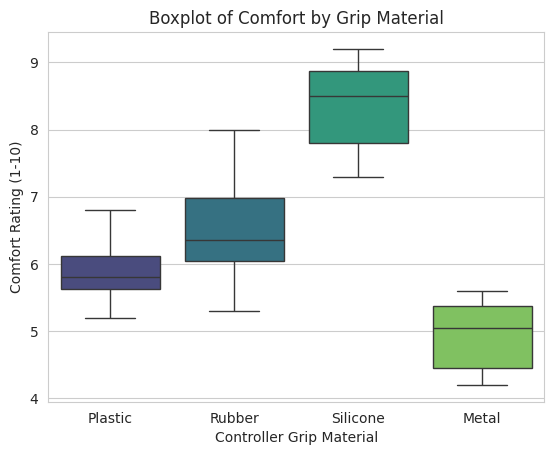

In [3]:
import pandas as pd

# read in the dataset
game = pd.read_excel("Video Game Controllers.xlsx")

# checking that it read in properly
game.info()

## EDA & SUMMARY STATISTICS

import seaborn as sns
import matplotlib.pyplot as plt

# getting mean IBU and std dev by aging time
summary_stats = game.groupby('Material')['Comfort'].agg(['mean','std'])

print(summary_stats)

# boxplot of IBU by aging time
sns.set_style("whitegrid")

## Create boxplot using seaborn ##

sns.boxplot(x="Material",y="Comfort",data=game, palette="viridis")

## Add Title and Labels using matplotlib ##

plt.title("Boxplot of Comfort by Grip Material", loc='center')
plt.xlabel("Controller Grip Material")
plt.ylabel("Comfort Rating (1-10)")

The EDA more strongly supports the alternative hypothesis. Silicone had the highest comfort level and had no overlap in range with plastic or metal suggesting the average may be significantly different.

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a testing and visual method. Do the results of the normality test(s) support the assumption of normality?



            df    sum_sq    mean_sq          F        PR(>F)
Material   3.0  60.73675  20.245583  47.478405  1.348029e-12
Residual  36.0  15.35100   0.426417        NaN           NaN


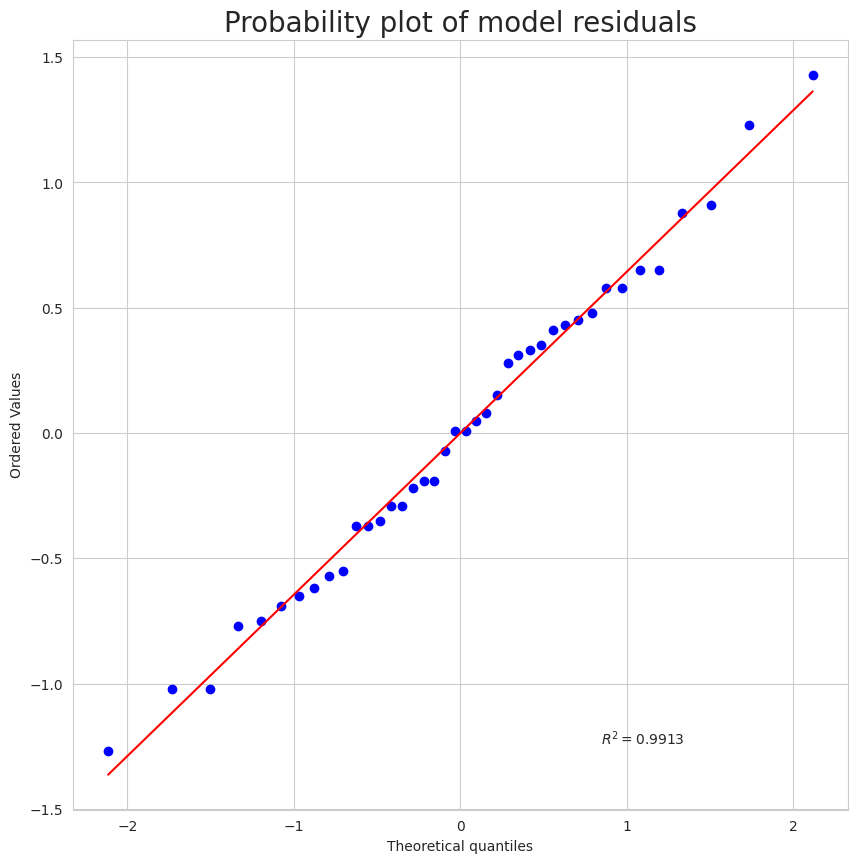

ShapiroResult(statistic=np.float64(0.9884713563029021), pvalue=np.float64(0.9509274348395812))

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# building ANOVA model
game_model = ols("Comfort~Material", data=game).fit()
print(sm.stats.anova_lm(game_model,typ=1))

import scipy.stats as stats

#getting residuals from model
game_resid = game_model.resid

# QQ plot
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

normality_plot, stat = stats.probplot(game_resid, plot=plt, rvalue=True)
ax.set_title("Probability plot of model residuals", fontsize=20)
ax.set

plt.show()

#Shapiro-Wilk Test of Normality
stats.shapiro(game_resid)

When plotted, the residuals fall closely along the straight line with no systematic deviation suggesting normality. This was confirmed by the Shapiro-Wilk's Test (W=0.99, p=0.95>alpha=0.05).

**Question 8.** Test the assumption of homogeneity of variance using **both** a testing and visual method. Do the results of the test(s) support the assumption of homogeneity of variance?


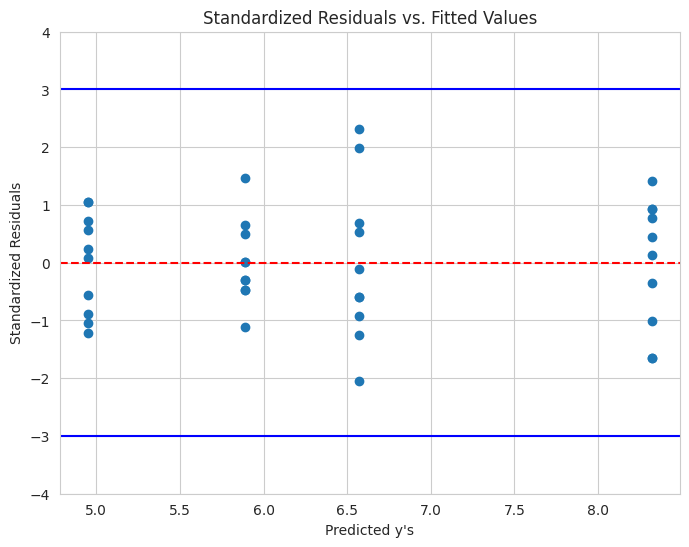

F-statistic: 2.200888430898914
F p-value: 0.10479321791365742


In [6]:
# getting standardized residuals
stand_resid=game_model.get_influence().resid_studentized_internal

# getting fitted values
fitted_values = game_model.fittedvalues

#plotting standardized residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, stand_resid)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

#importing the B-P test
from statsmodels.stats.diagnostic import het_breuschpagan

#running B-P test
bp_test = het_breuschpagan(game_model.resid, game_model.model.exog)

#getting f-statistic
f_statistic= bp_test[2]

#getting p-value
f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")

When the standardized residuals were plotted against the fitted residuals, they were centered around 0 and had similar spread, which supports the assumption of homogeneity of variance. The Breuesch-Pagan Test confirmed that the assumption of constant variance was not violated (F=2.23, p=0.10>alpha=0.05).

**Question 9.** Report the F-statistic and its associated p-value for the test for the treatment factor. Which of our two hypotheses is more strongly supported? Why?



In [7]:
print(sm.stats.anova_lm(game_model,typ=1))

            df    sum_sq    mean_sq          F        PR(>F)
Material   3.0  60.73675  20.245583  47.478405  1.348029e-12
Residual  36.0  15.35100   0.426417        NaN           NaN


The alternative hypothesis that the mean comfort for at least one of the grip materials is significantly different from the others, is more strongly supported since the f-statistic of 47.48 has a p-value of <0.001.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which material types are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.


In [8]:
#importing tukey's post-hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#running tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=game['Comfort'], groups=game['Material'], alpha=0.05)

print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
  Metal  Plastic     0.94 0.0139  0.1535 1.7265   True
  Metal   Rubber     1.62    0.0  0.8335 2.4065   True
  Metal Silicone     3.37    0.0  2.5835 4.1565   True
Plastic   Rubber     0.68 0.1104 -0.1065 1.4665  False
Plastic Silicone     2.43    0.0  1.6435 3.2165   True
 Rubber Silicone     1.75    0.0  0.9635 2.5365   True
------------------------------------------------------


All material pairings except for plastic and rubber had significantly different mean comfort levels with the greatest difference occuring between metal and silicone.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.

It was concluded that the material used for controller grips affects the comfort level of the gamer. Silicone had the highest mean cofort score followed by rubber and plastic, and metal had the lowest mean comfort score. All the mean comfort levels differed significantly statistically except for rubber and plastic. I would recommend the company produce silicone grips to best maximize gamer comfort.

**PART 2 INSTRUCTIONS:** The same video game controller manufacturing company is now trying to get into the business of creating virtual reality/artificial intelligence content for education. Specifically, they want to build a VR experience to simulate working with elderly patients at a healthcare facility to better prepare nursing students for potential careers in working with elderly patients. To test the VR's effectiveness, a group of 40 undergraduate nursing students were randomly and equally assigned to either a class session utilizing the VR or a class session using a traditional technique for teaching strategies for working with elderly patients. At the end of the class session, a 50 question quiz was given to both groups which measures attitudes toward elderly people. Scores range from 0-50 with greater scores indicating more favorable attitudes toward elderly people and vice versa. However, some students in the group have had prior working experience with elderly people which may have an effect on the quiz outcome. So in the experiment, we document which students have had prior working experience with elderly people and which haven't. The results of the experiment are contained in the `Nursing VR Study.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine if the different teaching methods (VR or traditional) affect nursing students' attitude towards elderly patients while controlling for prior experience working with the elderly.

**Question 2.** Specify the outcome variable

The outcome variable is the measured attitude towards elderly patients

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

IV: teaching method
BF: prior experience working with elderly
Some possible lurking variables could be the students' attitude towards the elderly prior to the class since this may not be aligned with their prior work experience.

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

Since we have identified a confouding variable (prior working experience with the lederly), a randomized block design allows us to split the nurses into those who have and have not worked with the elderly to account for the effect of the confouding variable. A completely randomized design would not adjust for the effect of prior work experience on attitude towrds elderly patients.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null: The average test score is equal for both teaching methods
$$ H_0: \mu_{\text{VR}} = \mu_{\text{Traditional}} $$

Alternative: At least one pair of group means are not equal.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Method      40 non-null     object
 1   Experience  40 non-null     object
 2   Score       40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB
None
                                 mean       std
Experience          Method                     
No Prior Experience Traditional  31.5  5.060742
                    VR           40.3  6.183311
Prior Experience    Traditional  31.1  6.505553
                    VR           41.2  7.857056


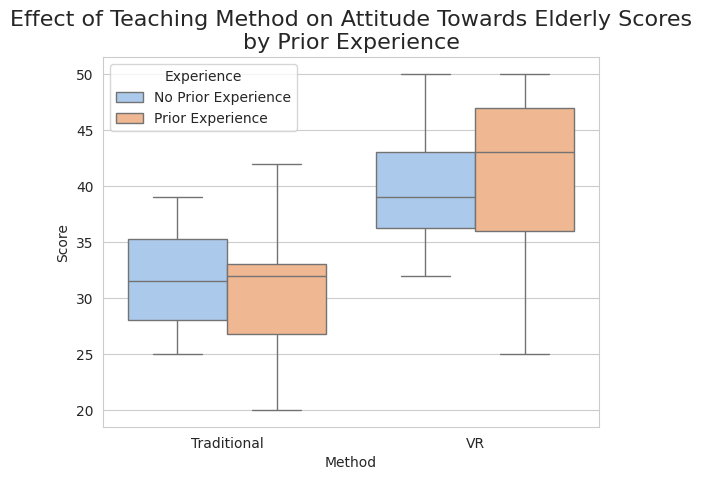

In [11]:
# importing libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# importing data
vr = pd.read_excel("Nursing VR Study.xlsx")
print(vr.info())

# means and sd by experience and teaching method
sum_stats = vr.groupby(['Experience','Method'])['Score'].agg(['mean','std'])

print(sum_stats)

# stratified boxplots
# first want to fix order of prior knowledge
order = ["No Prior Experience","Prior Experience"]
vr['Experience'] = pd.Categorical(vr['Experience'],
                                          categories=order,
                                          ordered=True)
# actually making boxplot
sns.set_style("whitegrid")

sns.boxplot(
    data=vr,
    x='Method',
    y='Score',
    hue='Experience',
    hue_order=order, # Manually set the order of the hue variable
    palette='pastel' # Choose a color palette
)

## Step 3: Add labels and titles ##

plt.title("Effect of Teaching Method on Attitude Towards Elderly Scores\nby Prior Experience",
          loc='center',
          fontsize=16)

## Show the plot ##

plt.show()

The EDA seems to support the alternative hypothesis given that the means for the VR group are more than one standard devition higher than the traditional group for both levels of experience. This is supported by the box plots, since the boxes for VR and traditional do not overlap (when compared within the same experience level).

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?




              sum_sq    df          F    PR(>F)
Method       893.025   1.0  21.805174  0.000039
Experience     0.625   1.0   0.015261  0.902353
Residual    1515.325  37.0        NaN       NaN


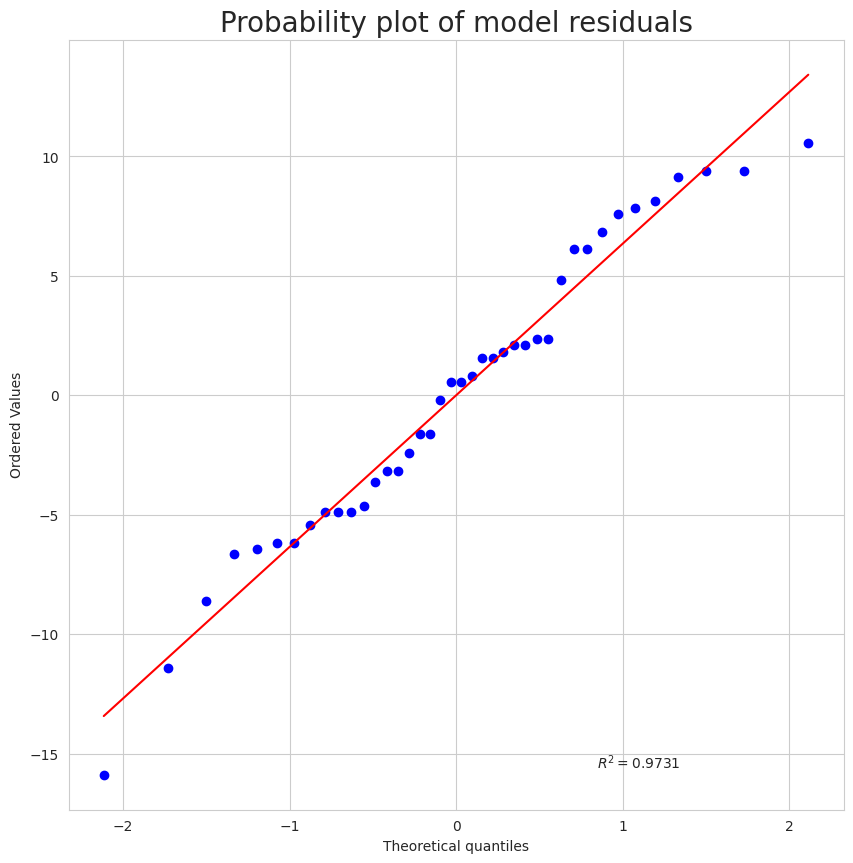

ShapiroResult(statistic=np.float64(0.9695982954527383), pvalue=np.float64(0.34949575286638046))


In [12]:
# fitting anova model
vr_model=ols('Score~Method+Experience', data=vr).fit()
print(sm.stats.anova_lm(vr_model, typ=2))

# testing normality

import scipy.stats as stats
vrmod_resid=vr_model.resid

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(vrmod_resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residuals", fontsize= 20)
ax.set

plt.show()

# s-w test for nomality
print(stats.shapiro(vrmod_resid))

The points on the QQ plot follow the line clsoely with minimal deviation at the ends supporting the assumption of normality. The SW test aslo supports the assumption of normality given that p=0.35>0.05.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?




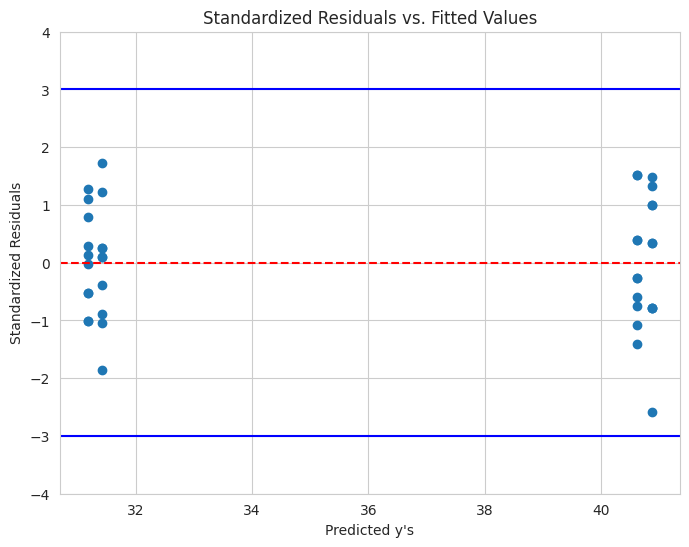

F-statistic: 1.1614606051728236
F p-value: 0.3241791601149208


In [13]:
# testing for homogeneity
standard_resid=vr_model.get_influence().resid_studentized_internal
fitted_vals=vr_model.fittedvalues

# plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, standard_resid)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

# b-p test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(vrmod_resid, vr_model.model.exog)

f_stat = bp_test[2]
f_p_val = bp_test[3]

print(f"F-statistic: {f_stat}")
print(f"F p-value: {f_p_val}")

The residuals all fall between -3 and 3, have similar spreads and are both evenly distributed above and below the center line (0) suggesting homogeneity. This is supported by the BP test with an F Statistic of 1.16 and a p-value of 0.32 which is greater than 0.05.

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?




In [14]:
print(sm.stats.anova_lm(vr_model,typ=2))

              sum_sq    df          F    PR(>F)
Method       893.025   1.0  21.805174  0.000039
Experience     0.625   1.0   0.015261  0.902353
Residual    1515.325  37.0        NaN       NaN


The data more strongly supports the alternative hypothesis, that the mean scores for the teaching methods statistically meaningfully differ (F=21.8, p-value=<0.001, alpha=0.05).

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [15]:
# tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(endog=vr['Score'], groups=vr['Method'],
                                  alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
   group1   group2 meandiff p-adj lower   upper  reject
-------------------------------------------------------
Traditional     VR     9.45   0.0 5.4066 13.4934   True
-------------------------------------------------------


The traditional and vr groups mean scores are statistically meaningfully different from each other.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

It was concluded that teaching method did impact attitude towards the elderly when controlling for prrio experience working with elderly patients. Nursing students taught using the VR method had meaningfully higher scores on their attitude towrds elderly assessment. One limitation of the study is that the assesment was not taken beforehand so ther is noway to account for the influence of their initial attitude towards the elderly on their final assesment score. Although having prior experience may account for initial attitude towards elderly, people with experience may be more likely to have stronger negative/positive attitudes towards the elderly based on if they enjoyed their experience.

**PART 3 INSTRUCTIONS:** Please briefly respond to the following questions:

**Question 1.** Give a reason why one-factor CRD wouldn't generally be appropriate for studies involving human participants.

In a CRD, you are assumed to be controlling for any major lurking variables in the study design itself. Human participants are quite complex and different, making it difficult to control for all lurking variables in the data collection process rather than the modeling process.

**Question 2.** What is the purpose of post-hoc tests?

Post-hoc tests allow us to identify specifically, which levels of our treatment/independent variable have means that are statistically meaningfully different from the other levels. Since an ANOVA can only tell us if there is a difference, a post-hoc is needed to idnetify between which groups the differences occur.

**Question 3.** Explain the difference between RBD and LSD.

A LSD is similar to an RBD but allows us to account for two lurking variable given that the number of levels in the outcome variable and both lurking variables are equal. A RBD can account for one lurking variable regardless of the number of levels within the outcome and lurking variables.

**Question 4.** Explain why randomization is important in designing experiments.

Randomization is important to limit sources of variation due to the way the sample is divied into the treatment groups.

**Question 5.** Explain why replication is important in designing experiments.

Replication is crucial to experimental design to ensure that the effects on the outcome variable are real. If there is only one subject in each treatment group, it cannot be assumed that any differences in the outcome variable are caused by the treatment rather than random occurence.